In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings
import plotly.express as px
import statsmodels.api as sm
from itertools import product
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [111]:
df = pd.read_csv(r'C:\Users\Divyanshu Chaudhari\Downloads\country_vaccinations_new.csv')

In [112]:
df.tail()

country iso_code        date  total_vaccinations  people_vaccinated  \
18759  Zimbabwe      ZWE  2021-05-14            775241.0           571460.0   
18760  Zimbabwe      ZWE  2021-05-15            793311.0           579769.0   
18761  Zimbabwe      ZWE  2021-05-16            796947.0           581615.0   
18762  Zimbabwe      ZWE  2021-05-17            814258.0           591808.0   
18763  Zimbabwe      ZWE  2021-05-18            831954.0           600579.0   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
18759                 203781.0                 23221.0             19211.0   
18760                 213542.0                 18070.0             19353.0   
18761                 215332.0                  3636.0             16101.0   
18762                 222450.0                 17311.0             17658.0   
18763                 231375.0                 17696.0             17455.0   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
18759                            5.22                           3.84   
18760                            5.34                           3.90   
18761                            5.36                           3.91   
18762                            5.48                           3.98   
18763                            5.60                           4.04   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
18759                                 1.37                          1293.0   
18760                                 1.44                          1302.0   
18761                                 1.45                          1083.0   
18762                                 1.50                          1188.0   
18763                                 1.56                          1174.0   

                vaccines         source_name  \
18759  Sinopharm/Beijing  Ministry of Health   
18760  Sinopharm/Beijing  Ministry of Health   
18761  Sinopharm/Beijing  Ministry of Health   
18762  Sinopharm/Beijing  Ministry of Health   
18763  Sinopharm/Beijing  Ministry of Health   

                                          source_website  
18759  https://twitter.com/MoHCCZim/status/1394757158...  
18760  https://twitter.com/MoHCCZim/status/1394757158...  
18761  https://twitter.com/MoHCCZim/status/1394757158...  
18762  https://twitter.com/MoHCCZim/status/1394757158...  
18763  https://twitter.com/MoHCCZim/status/1394757158...

In [113]:
df.head(5)

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            35.0   
2                                  NaN                            35.0   
3                                  NaN                            35.0   
4                                  NaN                            35.0   

                                            vaccines  \
0  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   
1  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   
2  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   
3  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   
4  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   

                 source_name            source_website  
0  World Health Organization  https://covid19.who.int/  
1  World Health Organization  https://covid19.who.int/  
2  World Health Organization  https://covid19.who.int/  
3  World Health Organization  https://covid19.who.int/  
4  World Health Organization  https://covid19.who.int/

# Data Cleaning

In [114]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [115]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                      7969
people_vaccinated                       8726
people_fully_vaccinated                11097
daily_vaccinations_raw                  9766
daily_vaccinations                       213
total_vaccinations_per_hundred          7969
people_vaccinated_per_hundred           8726
people_fully_vaccinated_per_hundred    11097
daily_vaccinations_per_million           213
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [116]:
df.shape

(18764, 15)

In [117]:
#Droppin total_vaccinations missing data, as without this value any raw doesn't make much sense.
df = df.drop(df[df.total_vaccinations.isna()].index)

In [118]:
df.shape

(10795, 15)

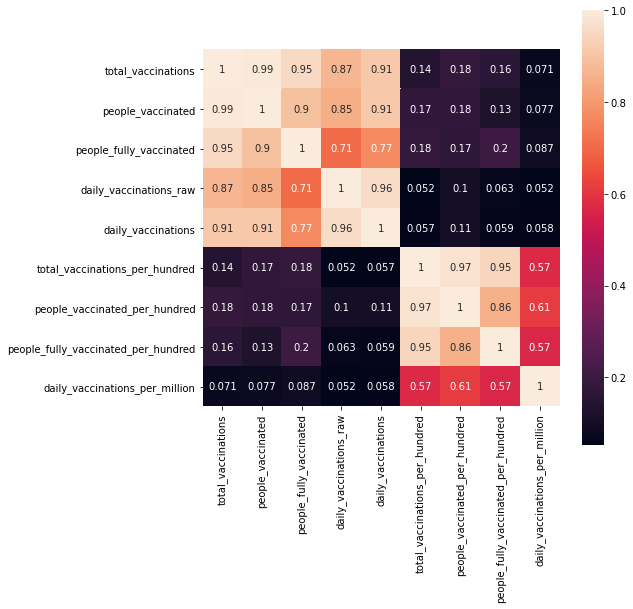

In [119]:
plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, square=True)
plt.show()

The values of total_vaccinations column are strongly correlated with people_vaccinated column's.4

In [120]:
df.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                       844
people_fully_vaccinated                3129
daily_vaccinations_raw                 1797
daily_vaccinations                      211
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred           844
people_fully_vaccinated_per_hundred    3129
daily_vaccinations_per_million          211
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [121]:
#df_copy = df.copy()

In [122]:
#df_copy = df_copy.drop(df_copy[df_copy.people_vaccinated.isna()].index)

In [123]:
#Let's check the hypothesis that these columns distributions are the same.
#We will use Mann-Whithey U test for this goal.

In [124]:
scipy.stats.mannwhitneyu(df.total_vaccinations, df.people_vaccinated, alternative='two-sided')

MannwhitneyuResult(statistic=56890750.5, pvalue=0.0026695698080454987)

As p-value is less than 0.05, which means we reject our hyphotesis.
So, we will fill the missing values with 0.

In [125]:
df.people_vaccinated = df.people_vaccinated.fillna(0)

In [126]:
df.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                3129
daily_vaccinations_raw                 1797
daily_vaccinations                      211
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred           844
people_fully_vaccinated_per_hundred    3129
daily_vaccinations_per_million          211
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

Other Strong correlations that we identify from the above heatmap are:

2.total_vaccinations_per_hundred vs people_vaccinated_per_hundred
3.daily_vaccinations vs  people_vaccinated
4.daily_vaccinations_per_million vs people_vaccinated_per_hundred
5.people_fully_vaccinated vs  total_vaccinations
6.people_fully_vaccinated_per_hundred vs total_vaccinations_per_hundred
7.daily_vaccinations_raw vs daily_vaccinations

In [127]:
scipy.stats.mannwhitneyu(df.total_vaccinations_per_hundred, df.people_vaccinated_per_hundred, alternative='two-sided')

MannwhitneyuResult(statistic=57905856.5, pvalue=0.4315482792032509)

In [128]:
#df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.fillna(0)
diff_per_hundred = df.total_vaccinations_per_hundred.mean() - df.people_vaccinated_per_hundred.mean()
df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.fillna(df.total_vaccinations_per_hundred - diff_per_hundred)

In [129]:
scipy.stats.mannwhitneyu(df.daily_vaccinations, df.people_vaccinated, alternative='two-sided')

MannwhitneyuResult(statistic=29366750.0, pvalue=0.0)

In [130]:
df.daily_vaccinations = df.daily_vaccinations.fillna(0)

In [131]:
scipy.stats.mannwhitneyu(df.daily_vaccinations_per_million, df.people_vaccinated_per_hundred, alternative='two-sided')

MannwhitneyuResult(statistic=114912595.5, pvalue=0.0)

In [132]:
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.fillna(0)

In [133]:
scipy.stats.mannwhitneyu(df.people_fully_vaccinated, df.total_vaccinations, alternative='two-sided')

MannwhitneyuResult(statistic=66328301.0, pvalue=2.169668356818736e-69)

In [134]:
df.people_fully_vaccinated = df.people_fully_vaccinated.fillna(0)

In [135]:
scipy.stats.mannwhitneyu(df.people_fully_vaccinated_per_hundred, df.total_vaccinations_per_hundred, alternative='two-sided')

MannwhitneyuResult(statistic=62889277.0, pvalue=5.70888857535949e-24)

In [136]:
df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.fillna(0)

In [137]:
scipy.stats.mannwhitneyu(df.daily_vaccinations_raw, df.daily_vaccinations, alternative='two-sided')

MannwhitneyuResult(statistic=70580864.0, pvalue=2.5516766302881847e-159)

In [138]:
df.daily_vaccinations_raw = df.daily_vaccinations_raw.fillna(0)

In [139]:
df.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [140]:
df.shape

(10795, 15)

# Data Visualization

### 1. Which country has the highest number of vacinations

In [141]:
cols = ['country', 'total_vaccinations', 'iso_code', 'vaccines', 'total_vaccinations_per_hundred']
vacc_amount = df[cols].groupby('country').max().sort_values('total_vaccinations', ascending=False)

In [142]:
vacc_amount.head(5)

total_vaccinations iso_code  \
country                                       
China                  435689000.0      CHN   
United States          275535207.0      USA   
India                  185191602.0      IND   
United Kingdom          57357857.0      GBR   
Brazil                  54332240.0      BRA   

                                                    vaccines  \
country                                                        
China            Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac   
United States      Johnson&Johnson, Moderna, Pfizer/BioNTech   
India                            Covaxin, Oxford/AstraZeneca   
United Kingdom  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
Brazil          Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac   

                total_vaccinations_per_hundred  
country                                         
China                                    30.27  
United States                            82.39  
India                                    13.42  
United Kingdom                           84.49  
Brazil                                   25.56

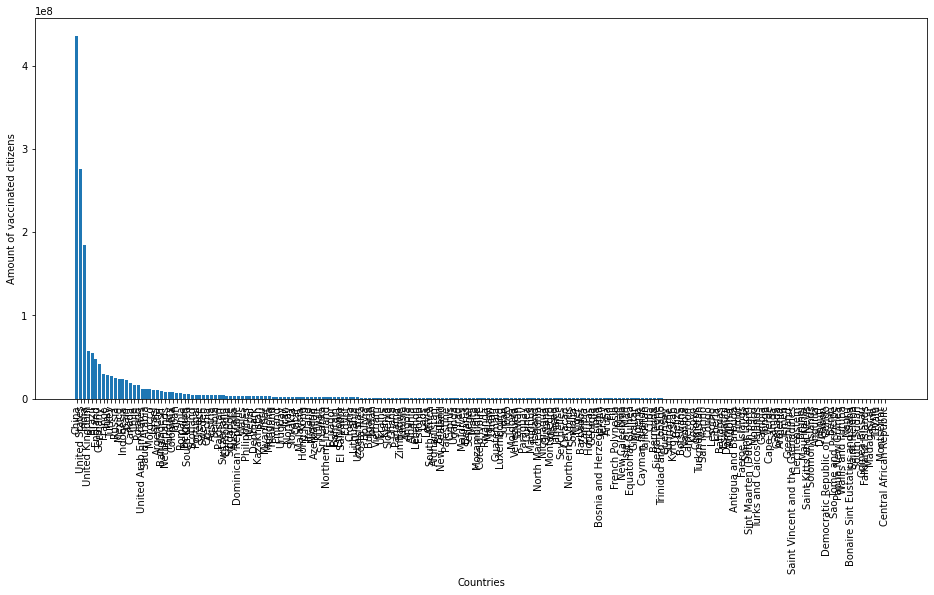

In [143]:
plt.figure(figsize=(16, 7))
plt.bar(vacc_amount.index, vacc_amount.total_vaccinations)
plt.xticks(rotation = 90)
plt.ylabel('Amount of vaccinated citizens')
plt.xlabel('Countries')
plt.show()

In [144]:
#Check which country has missing ISO code
df[df.iso_code.isna()].country.unique()

array([], dtype=object)

In [145]:
#Geoplot using Choropleth
fig = px.choropleth(locations=vacc_amount.iso_code, color=vacc_amount.total_vaccinations, title='Total Vaccinations across countries', 
                   color_continuous_scale='rainbow')
fig.show('notebook')

## 2. Which country has its biggest part of population vaccinated

In [146]:
vacc_amount = vacc_amount.sort_values('total_vaccinations_per_hundred', ascending=False)

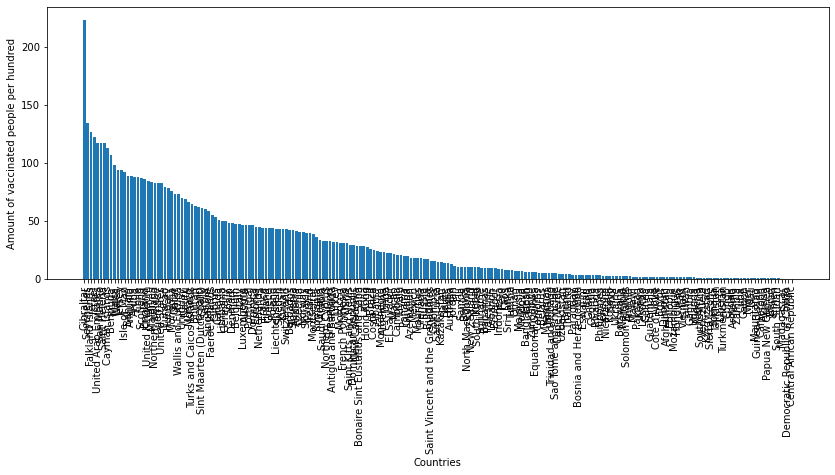

In [147]:
plt.figure(figsize=(14, 5))
plt.bar(vacc_amount.index, vacc_amount.total_vaccinations_per_hundred)
plt.xticks(rotation = 90)
plt.ylabel('Amount of vaccinated people per hundred')
plt.xlabel('Countries')
plt.show()

In [148]:
fig = px.choropleth(locations=vacc_amount.iso_code, color=vacc_amount.total_vaccinations_per_hundred, title='Amount of vaccinated citizens per hundred', 
                   color_continuous_scale='rainbow')
fig.show('notebook')

## 3. Most popular vaccine

In [149]:
vacc_pop = vacc_amount.groupby('vaccines').sum().sort_values('total_vaccinations', ascending=False)
print(vacc_pop.head(5))

                                                    total_vaccinations  \
vaccines                                                                 
Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac                435689000.0   
Johnson&Johnson, Moderna, Pfizer/BioNTech                  275535207.0   
Covaxin, Oxford/AstraZeneca                                185192269.0   
Johnson&Johnson, Moderna, Oxford/AstraZeneca, P...         177609568.0   
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech               145654669.0   

                                                    total_vaccinations_per_hundred  
vaccines                                                                            
Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac                                  30.27  
Johnson&Johnson, Moderna, Pfizer/BioNTech                                    82.39  
Covaxin, Oxford/AstraZeneca                                                  13.43  
Johnson&Johnson, Moderna, Oxford/AstraZeneca, P...      

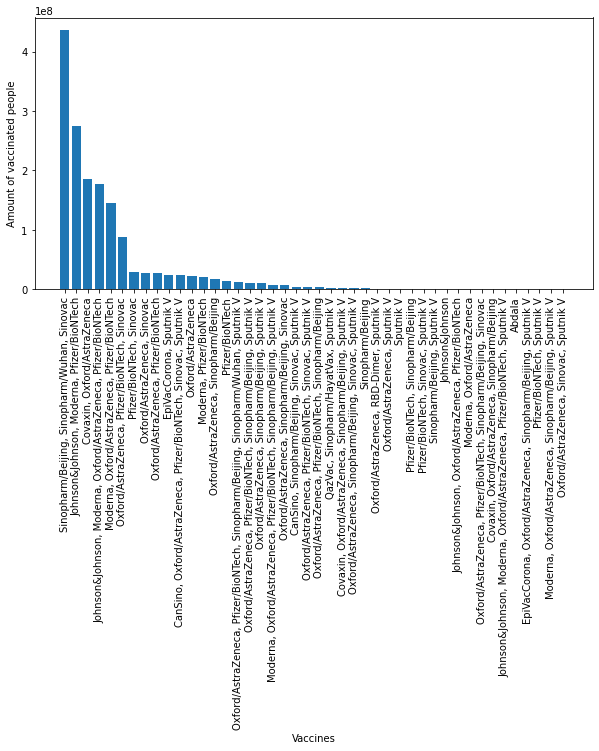

In [150]:
plt.figure(figsize=(10, 5))
plt.bar(vacc_pop.index, vacc_pop.total_vaccinations)
plt.xticks(rotation = 90)
plt.ylabel('Amount of vaccinated people')
plt.xlabel('Vaccines')
plt.show()

In [151]:
fig = px.choropleth(locations=vacc_amount.iso_code, color=vacc_amount.vaccines, title='Name of the vaccine', 
                   color_continuous_scale='rainbow')
fig.show()

## Mean daily Vaccinations per country

In [152]:
columns = ['daily_vaccinations','daily_vaccinations_per_million'] 
df[columns].replace(0,None)
vacc_amount['daily_vaccinations'] = df[['daily_vaccinations','country']].groupby('country').mean().sort_values('daily_vaccinations', ascending=False)
vacc_amount = vacc_amount.sort_values('daily_vaccinations', ascending=False)

In [153]:
vacc_amount.head(5)

total_vaccinations iso_code  \
country                                       
China                  435689000.0      CHN   
United States          275535207.0      USA   
India                  185191602.0      IND   
United Kingdom          57357857.0      GBR   
Brazil                  54332240.0      BRA   

                                                    vaccines  \
country                                                        
China            Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac   
United States      Johnson&Johnson, Moderna, Pfizer/BioNTech   
India                            Covaxin, Oxford/AstraZeneca   
United Kingdom  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
Brazil          Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac   

                total_vaccinations_per_hundred  daily_vaccinations  
country                                                             
China                                    30.27        4.741280e+06  
United States                            82.39        1.935977e+06  
India                                    13.42        1.453707e+06  
United Kingdom                           84.49        4.184112e+05  
Brazil                                   25.56        4.146037e+05

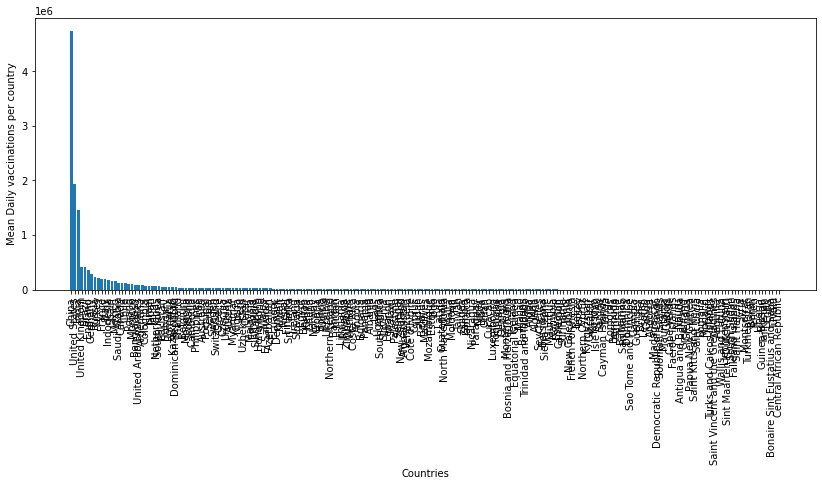

In [154]:
plt.figure(figsize=(14, 5))
plt.bar(vacc_amount.index, vacc_amount.daily_vaccinations)
plt.xticks(rotation = 90)
plt.ylabel('Mean Daily vaccinations per country')
plt.xlabel('Countries')
plt.show()

In [155]:
fig = px.choropleth(locations=vacc_amount.iso_code, color=vacc_amount.daily_vaccinations, title='Daily vaccinations per country', 
                   color_continuous_scale='rainbow')
fig.show()

## Daily Vaccinations per Million

In [156]:
vacc_amount['daily_vaccinations_per_million'] = df[['daily_vaccinations_per_million','country']].groupby('country').mean()
vacc_amount = vacc_amount.sort_values('daily_vaccinations_per_million', ascending=False)

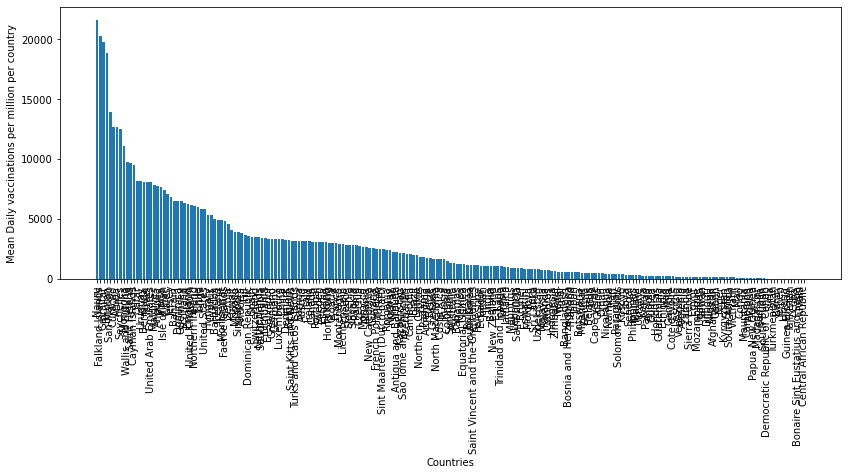

In [157]:
plt.figure(figsize=(14, 5))
plt.bar(vacc_amount.index, vacc_amount.daily_vaccinations_per_million)
plt.xticks(rotation = 90)
plt.ylabel('Mean Daily vaccinations per million per country')
plt.xlabel('Countries')
plt.show()

In [158]:
fig = px.choropleth(locations=vacc_amount.iso_code, color=vacc_amount.daily_vaccinations_per_million, title='Daily vaccinations per million per country', 
                   color_continuous_scale='rainbow')
fig.show()

# Vaccination amount prediction

## How the vaccinations progress changes over time

In [159]:
t_cols = ['date', 'total_vaccinations']
timeseries_cov = df[t_cols].groupby('date').sum()[4:-1]

def invboxcox(y, l):
    if l == 0:
        return np.exp(y)
    else:
        return np.exp(np.log(l*y+1)/l)

In [160]:
print(timeseries_cov)

            total_vaccinations
date                          
2020-12-06        2.000000e+00
2020-12-07        4.000000e+00
2020-12-08        4.000000e+00
2020-12-09        5.000000e+00
2020-12-10        6.000000e+00
...                        ...
2021-05-13        1.394810e+09
2021-05-14        1.376011e+09
2021-05-15        1.380323e+09
2021-05-16        1.465803e+09
2021-05-17        1.497409e+09

[163 rows x 1 columns]


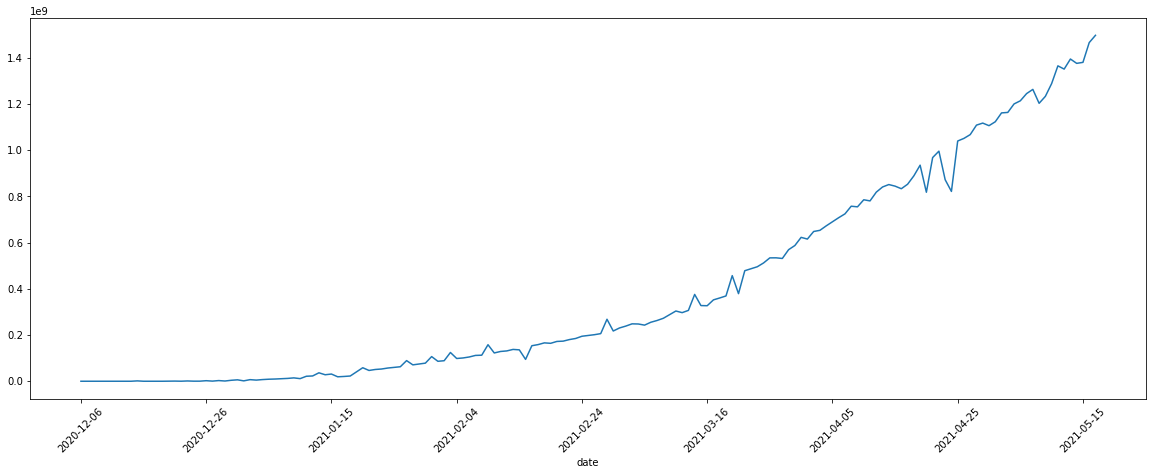

In [161]:
plt.figure(figsize=(20,7))
timeseries_cov.total_vaccinations.plot()
plt.xticks(rotation=45)
plt.show()

#### What can bee seen, is that despite some days the amount of vaccinated people falls, the vaccination has strong long uptrend.


# Timeseries transformations to make it stationary

#### Testing For Stationarity using Dickey-Fuller Test

In [162]:
from statsmodels.tsa.stattools import adfuller

In [163]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [164]:
adfuller_test(timeseries_cov['total_vaccinations'])

ADF Test Statistic : 6.240511150727795
p-value : 1.0
#Lags Used : 5
Number of Observations Used : 157
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [165]:
timeseries_cov['total_vaccinations_box'], l = scipy.stats.boxcox(timeseries_cov.total_vaccinations)

In [166]:
print(timeseries_cov)

            total_vaccinations  total_vaccinations_box
date                                                  
2020-12-06        2.000000e+00                0.751471
2020-12-07        4.000000e+00                1.632854
2020-12-08        4.000000e+00                1.632854
2020-12-09        5.000000e+00                1.947835
2020-12-10        6.000000e+00                2.217471
...                        ...                     ...
2021-05-13        1.394810e+09              547.598792
2021-05-14        1.376011e+09              545.878497
2021-05-15        1.380323e+09              546.274711
2021-05-16        1.465803e+09              553.938737
2021-05-17        1.497409e+09              556.685332

[163 rows x 2 columns]


In [167]:
print('p-value : {}'.format(sm.tsa.stattools.adfuller(timeseries_cov.drop(columns=['total_vaccinations']))[1]))

p-value : 0.010843188329114212


In [168]:
#adfuller_test(timeseries_cov['total_vaccinations_box'])

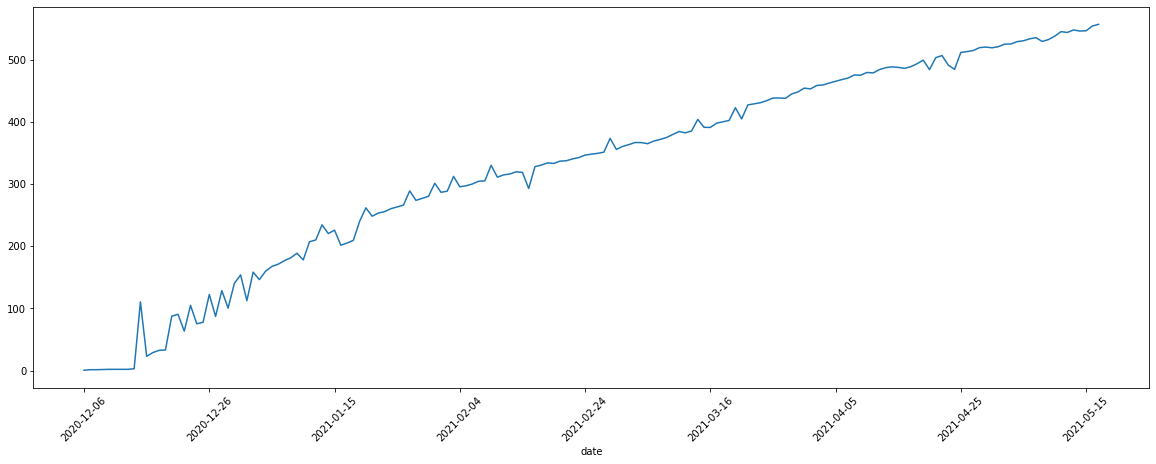

In [169]:
plt.figure(figsize=(20,7))
timeseries_cov.total_vaccinations_box.plot()
plt.xticks(rotation=45)
plt.show()

In [170]:
timeseries_cov['total_vaccinations_box_diff1int2'] = timeseries_cov.total_vaccinations_box - timeseries_cov.total_vaccinations_box.shift(2)

In [171]:
timeseries_cov['total_vaccinations_box_diff2int2'] = timeseries_cov['total_vaccinations_box_diff1int2'] - timeseries_cov['total_vaccinations_box_diff1int2'].shift(2)

In [172]:
print('p-value : {}'.format(sm.tsa.stattools.adfuller(timeseries_cov.drop(columns=['total_vaccinations', 'total_vaccinations_box', 'total_vaccinations_box_diff1int2'])[4:])[1]))

p-value : 9.511064533896905e-07


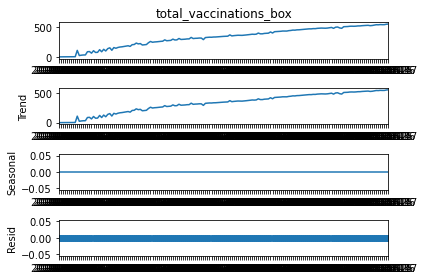

In [173]:
sm.tsa.seasonal_decompose(timeseries_cov.total_vaccinations_box, period=1).plot()
plt.show()

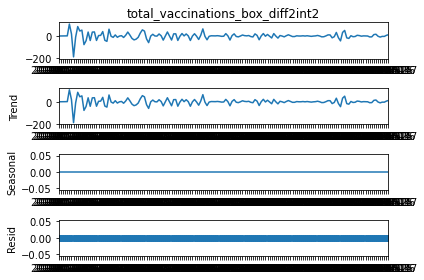

In [174]:
sm.tsa.seasonal_decompose(timeseries_cov.total_vaccinations_box_diff2int2[4:], period=1).plot()
plt.show()

## • ACF and PACF (Autocorrelation function and Partial autocorrelation function)

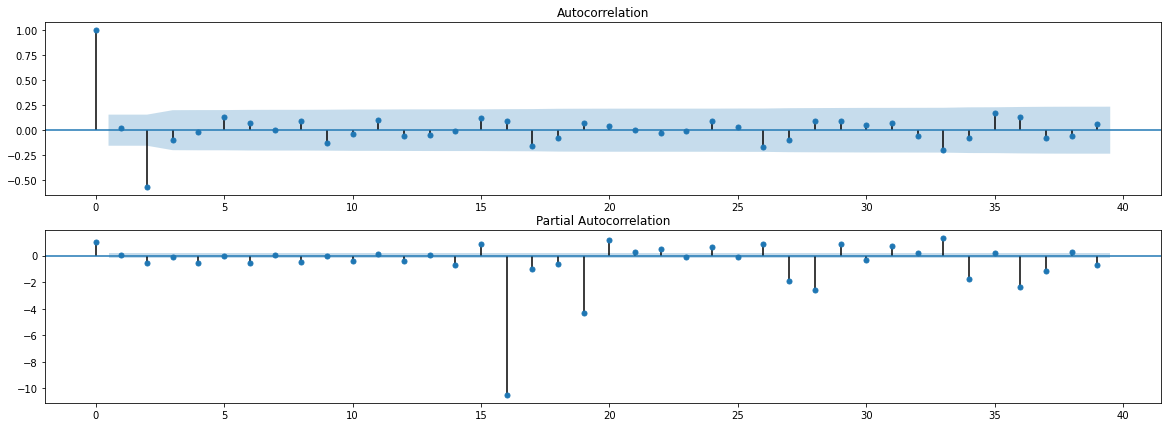

In [175]:
plt.figure(figsize=(20, 7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(timeseries_cov.drop(columns=['total_vaccinations', 'total_vaccinations_box', 'total_vaccinations_box_diff1int2'])[4:], 
                         lags=(len(timeseries_cov)-4)/4, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(timeseries_cov.drop(columns=['total_vaccinations', 'total_vaccinations_box', 'total_vaccinations_box_diff1int2'])[4:], 
                         lags=(len(timeseries_cov)-4)/4, ax=ax)
plt.show()

In [176]:
d = 0
D = 2

In [177]:
%%time
results = []
best_aic = float('inf')

parameters = list(product(np.arange(0, 7), np.arange(0, 7), np.arange(0, 7), np.arange(0, 7)))

for param in tqdm(parameters):
    try:
        arima = sm.tsa.statespace.SARIMAX(timeseries_cov.total_vaccinations_box, order=(param[0], d, param[1]), 
                                          seasonal_order=(param[2], D, param[3], 2)).fit(disp=False)
    except:
        continue
    aic = arima.aic
    if aic < best_aic:
        optimal_arima = arima
        best_aic = aic
        best_param = param
    results.append([param, optimal_arima.aic])

100%|██████████████████████████████████████████████████████████████████████████████| 2401/2401 [03:33<00:00, 11.22it/s]

Wall time: 3min 33s


In [178]:
print(optimal_arima.summary())

                                     SARIMAX Results                                      
Dep. Variable:             total_vaccinations_box   No. Observations:                  163
Model:             SARIMAX(4, 0, 4)x(0, 2, [], 2)   Log Likelihood                -640.218
Date:                            Thu, 20 May 2021   AIC                           1298.435
Time:                                    13:21:00   BIC                           1326.055
Sample:                                12-06-2020   HQIC                          1309.651
                                     - 05-17-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1949      0.072     -2.696      0.007      -0.337      -0.053
ar.L2         -0.1328      0.095   

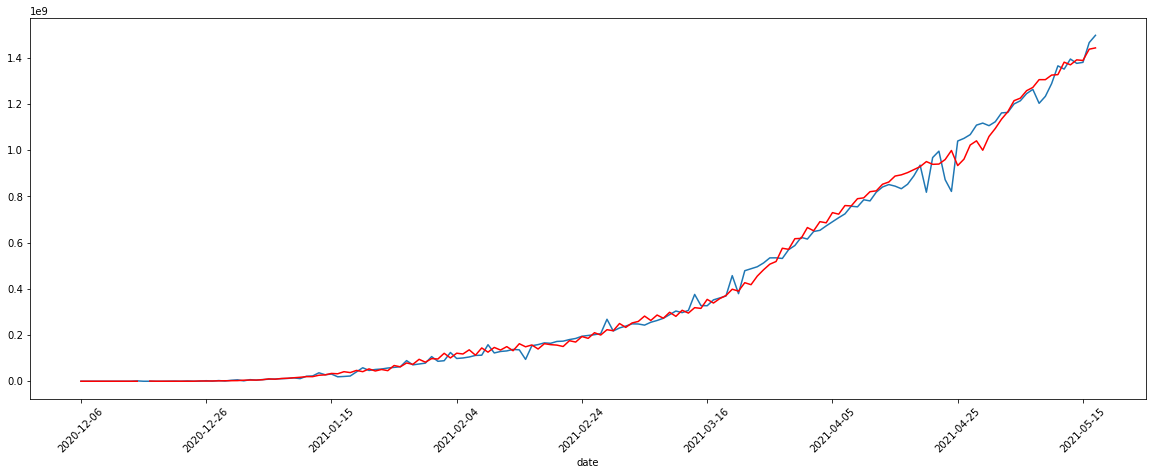

In [179]:
timeseries_cov['arima'] = invboxcox(optimal_arima.fittedvalues, l)
plt.figure(figsize=(20,7))
timeseries_cov.total_vaccinations.plot()
timeseries_cov.arima.plot(color='r')
plt.xticks(rotation=45)
plt.show()

## Making Predictions

In [180]:
date = ['2021-02-'+str(x) for x in range(10, 17)]
timeseries = timeseries_cov['total_vaccinations']
pred_df = pd.DataFrame(index=date)
pred_df['total_vaccinations'] = invboxcox(optimal_arima.predict(start=44, end=50).values, l)
timeseries = pd.concat([timeseries, pred_df])

In [181]:
timeseries.drop(columns=[0])[-7:]

total_vaccinations
2021-02-10        4.690146e+07
2021-02-11        4.148046e+07
2021-02-12        5.345956e+07
2021-02-13        4.438902e+07
2021-02-14        5.090001e+07
2021-02-15        4.581802e+07
2021-02-16        6.807968e+07

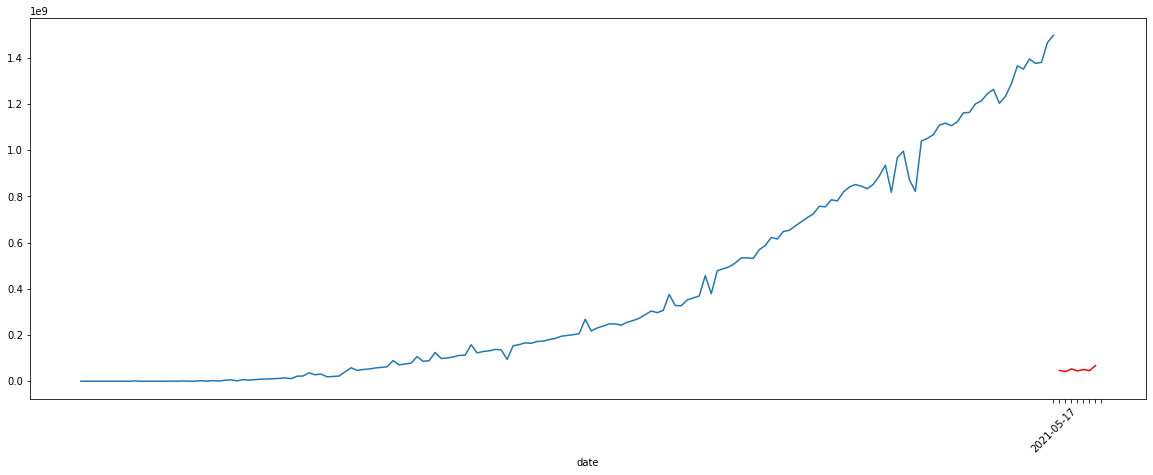

In [182]:
timeseries_cov['arima'] = invboxcox(optimal_arima.fittedvalues, l)
plt.figure(figsize=(20,7))
timeseries.total_vaccinations.plot(color='r')
timeseries_cov.total_vaccinations.plot()
plt.xticks(rotation=45)
plt.show()